# Land Cover Change Detection and Description

The purpose of this notebook is to provide an easy to use method for comparing and visualising differences between 2 tiles which were classified using the L3 FAO land cover classification system.

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import lccs_change
import matplotlib.pyplot as plt
import matplotlib as mplt

Define your input files
* *period1*: classified file for first time period
* *period2*: classified file for second time period
* *outputfile*: name of difference file to be save out

In [2]:
period1 = xr.open_rasterio('Townsville-2010.tif')
period2 = xr.open_rasterio('Townsville-2015.tif')
outputfile =               'Townsville-diff.tif'

# period1 = xr.open_rasterio('Forescue-2010.tif')
# period2 = xr.open_rasterio('Forescue-2015.tif')
# outputfile =               'Forescue-diff.tif'

# period1 = xr.open_rasterio('Snowy-2010.tif')
# period2 = xr.open_rasterio('Snowy-2015.tif')
# outputfile =               'Snowy-diff.tif'

# period1 = xr.open_rasterio('Gwydir-2010.tif')
# period2 = xr.open_rasterio('Gwydir-2015.tif')
# outputfile =               'Gwydir-diff.tif'

# period1 = xr.open_rasterio('Leichhardt-2010.tif')
# period2 = xr.open_rasterio('Leichhardt-2015.tif')
# outputfile =               'Leichhardt-diff.tif'

In [3]:
# Drop "band" coord if present (thanks, rasterio)
if 'band' in period1.coords: period1 = period1.isel(band=0, drop=True)
if 'band' in period2.coords: period2 = period2.isel(band=0, drop=True)
    
# Examine unique values in the loaded data (debugging)
print("T0:",np.unique(period1.values))
print("T1:",np.unique(period2.values))

T0: [111 112 123 124 215 216 227 228]
T1: [111 112 123 124 215 216 227 228]


In [4]:
# See all changes
changes = lccs_change.LCCS_ChangeDetect(period1, period2)

# or, only a particular type of change
#changes = lccs_change.LCCS_ChangeDetect(period1, period2, showonly=['degradation'])

# print(changes)

(<Figure size 1152x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0adc64e438>)

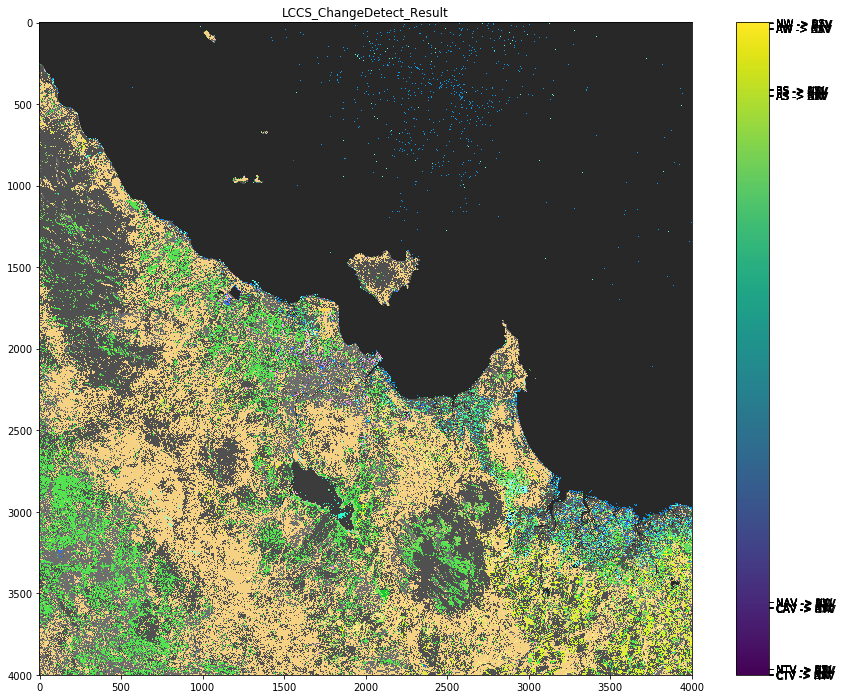

In [5]:
# visualise the changes
lccs_change.LCCS_Plot(changes)

In [6]:
da = changes

LCCS_Transition_Labels = {
    111111: 'stable',
    111112: 'afforestation',
    111123: 'change in agriculture',
    111124: 'afforestation',
    111215: 'urban expansion',
    111216: 'vegetation loss',
    111227: 'inundation',
    111228: 'inundation',
    
    112111: 'agricultural expansion',
    112112: 'stable',
    112123: 'agricultural expansion',
    112124: 'inundation',
    112215: 'urban expansion',
    112216: 'vegetation loss',
    112227: 'inundation',
    112228: 'inundation',
    
    123111: 'agriculture drainage',
    123112: 'afforestation/abandonment',
    123123: 'stable',
    123124: 'vegetation establishment',
    123215: 'urban expansion',
    123216: 'vegetation loss',
    123227: 'inundation',
    123228: 'inundation',
    
    124111: 'wetland drainage',
    124112: 'wetland loss',
    124123: 'wetland establishment',
    124124: 'stable',
    124215: 'urban expansion',
    124216: 'vegetation loss',
    124227: 'inundation',
    124228: 'inundation',
    
    215111: 'withdrawal of settlements',
    215112: 'withdrawal of settlements',
    215123: 'withdrawal of settlements',
    215124: 'withdrawal of settlements',
    215215: 'stable',
    215216: 'withdrawal of settlements',
    215227: 'inundation',
    215228: 'inundation',
    
    216111: 'agriculture expansion',
    216112: 'vegetation establishment',
    216123: 'vegetation establishment',
    216124: 'vegetation establishment',
    216215: 'urban expansion',
    216216: 'stable',
    216227: 'inundation',
    216228: 'inundation',
    
    227111: 'wetland drainage',
    227112: 'wetland drainage',
    227123: 'vegetation establishment',
    227124: 'vegetation establishment',
    227215: 'urban expansion',
    227216: 'wetland drainage',
    227227: 'stable',
    227228: 'wetland establishment',
    
    228111: 'wetland drainage',
    228112: 'vegetation encroachment',
    228123: 'wetland drainage',
    228124: 'vegetation encroachment',
    228215: 'urban expansion',
    228216: 'wetland drainage',
    228227: 'urban expansion',
    228228: 'stable',
}

LCCS_Category_Labels = { # Note: AC made up the L1/L2 labels... (see http://www.fao.org/docrep/003/x0596e/x0596e01f.htm)
    # L1
    100: 'Vxx',
    200: 'NVxx',
    # L2
    110: 'TVx',
    120: 'AVx',
    210: 'TNVx',
    220: 'ANVx',
    # L3
    111: 'CTV',
    112: 'NTV',
    123: 'CAV',
    124: 'NAV',
    215: 'AS',
    216: 'BS',
    227: 'AW',
    228: 'NW',
}

LCCS_Transitions = {} 
for idx in LCCS_Transition_Labels:
    a = idx//1000
    b = idx%1000
    if a==b:
        LCCS_Transitions[idx] = LCCS_Category_Labels[a]
    else:
        LCCS_Transitions[idx] = "{a} -> {b}".format(
            a=LCCS_Category_Labels[a],
            b=LCCS_Category_Labels[b])


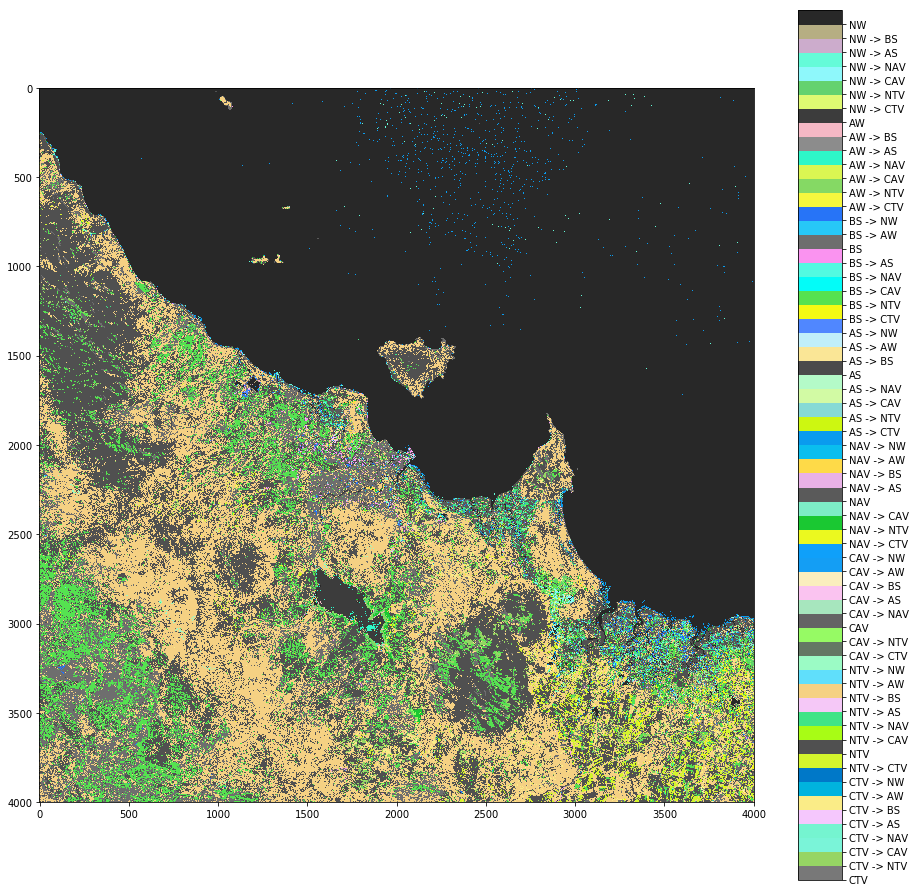

In [26]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import rasterio

nodata=da.nodata
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(16)

# Get all the values that were actually used so that labels aren't so crowded
unique_vals = list(da.counts.keys()) if 'counts' in da.attrs else np.unique(da.values)
if (nodata in unique_vals): unique_vals.remove(nodata)
vmin = np.min(unique_vals)
vmax = np.max(unique_vals)


colours = "#787878 #96d564 #7af4d8 #75f4d0 #f5c7fd #faec87 #00b3de #0078c8 #d4f52c #505050 #a8fc15 #40e487 #f5c8f7 #f5d183 #60dffb #9bfbc5 #647864 #96FA64 #646464 #A7E6BE #FAC3F0 #FAEEBE #149EF4 #0FA0FA #ebf91f #1ac832 #7dedc6 #5a5a5a #e9b1e6 #feda48 #0abeee #0a9bee #cdf711 #86dad5 #d2faa4 #b4fac8 #4b4b4b #fae696 #c0effa #5087ff #f4fa13 #55e250 #03fcf8 #53fae1 #fa93f0 #6e6e6e #27c8f7 #2774f7 #f5f83e #85d964 #dbf652 #2ef7c8 #8c8c8c #f5b8c5 #3c3c3c #0c41f0 #dffa72 #64d26f #8ef8fb #64fbd8 #ccaccc #b6ae83 #fae696 #282828"
bounds = [int(x) for x in "111111 111112 111123 111124 111215 111216 111227 111228 112111 112112 112123 112124 112215 112216 112227 112228 123111 123112 123123 123124 123215 123216 123227 123228 124111 124112 124123 124124 124215 124216 124227 124228 215111 215112 215123 215124 215215 215216 215227 215228 216111 216112 216123 216124 216215 216216 216227 216228 227111 227112 227123 227124 227215 227216 227227 227228 228111 228112 228123 228124 228215 228216 228227 228228".split(' ')]
d = dict(zip(bounds, colours.split()))
cols = [d[x] for x in unique_vals]

cmap = matplotlib.colors.ListedColormap(cols)
cmap.set_over("red")
#cmap.set_under("red")

norm = matplotlib.colors.BoundaryNorm(unique_vals + [555555], cmap.N)

im = ax.imshow(da,cmap=cmap, norm=norm)

cbar_ticks = unique_vals
cbar_labels = [(LCCS_Transitions[v] if v in LCCS_Transitions else '') for v in unique_vals]

cbar = fig.colorbar(im, ticks=cbar_ticks)

lab = cbar.ax.set_yticklabels(cbar_labels)


plt.show()


In [9]:
def view_colormap(cmap):
    """Plot a colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
        
    fig, ax = plt.subplots(1, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax.imshow([colors], extent=[0, 10, 0, 1])


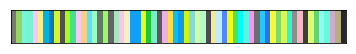

In [10]:
view_colormap(cmap)

In [25]:
unique_vals + [555555]

[111111,
 111112,
 111123,
 111124,
 111215,
 111216,
 111227,
 111228,
 112111,
 112112,
 112123,
 112124,
 112215,
 112216,
 112227,
 112228,
 123111,
 123112,
 123123,
 123124,
 123215,
 123216,
 123227,
 123228,
 124111,
 124112,
 124123,
 124124,
 124215,
 124216,
 124227,
 124228,
 215111,
 215112,
 215123,
 215124,
 215215,
 215216,
 215227,
 215228,
 216111,
 216112,
 216123,
 216124,
 216215,
 216216,
 216227,
 216228,
 227111,
 227112,
 227123,
 227124,
 227215,
 227216,
 227227,
 228111,
 228112,
 228123,
 228124,
 228215,
 228216,
 228228,
 1]

In [83]:
cols = [d[x] for x in unique_vals]

In [108]:
norm.boundaries

array([111111, 111112, 111123, 111124, 111215, 111216, 111227, 111228,
       112111, 112112, 112123, 112124, 112215, 112216, 112227, 112228,
       123111, 123112, 123123, 123124, 123215, 123216, 123227, 123228,
       124111, 124112, 124123, 124124, 124215, 124216, 124227, 124228,
       215111, 215112, 215123, 215124, 215215, 215216, 215227, 215228,
       216111, 216112, 216123, 216124, 216215, 216216, 216227, 216228,
       227111, 227112, 227123, 227124, 227215, 227216, 227227, 228111,
       228112, 228123, 228124, 228215, 228216, 228228], dtype=int32)

#### Detailed statistics about the changes

CTV: Cultivated terrestrial veg <br>
NTV: Natural terrestrial veg<br>
CAV: Cultivated aquatic veg<br>
NAV: Natural aquatic veg<br>
AS: Artificial surfaces<br>
BS: Bare soil<br>
AW: Artificial water<br>
NW: Natural water<br>

In [56]:
p = zip(colours.split(' '), bounds)

In [57]:
s = set(p)

In [60]:
s

{('#0078c8', 111228),
 ('#00b3de', 111227),
 ('#03fcf8', 216123),
 ('#0FA0FA', 123228),
 ('#0a9bee', 124228),
 ('#0abeee', 124227),
 ('#0c41f0', 227228),
 ('#149EF4', 123227),
 ('#1ac832', 124112),
 ('#2774f7', 216228),
 ('#27c8f7', 216227),
 ('#282828', 228228),
 ('#2ef7c8', 227124),
 ('#3c3c3c', 227227),
 ('#40e487', 112124),
 ('#4b4b4b', 215215),
 ('#505050', 112112),
 ('#5087ff', 215228),
 ('#53fae1', 216124),
 ('#55e250', 216112),
 ('#5a5a5a', 124124),
 ('#60dffb', 112227),
 ('#646464', 123123),
 ('#647864', 123111),
 ('#64d26f', 228112),
 ('#64fbd8', 228124),
 ('#6e6e6e', 216216),
 ('#75f4d0', 111124),
 ('#787878', 111111),
 ('#7af4d8', 111123),
 ('#7dedc6', 124123),
 ('#85d964', 227112),
 ('#86dad5', 215112),
 ('#8c8c8c', 227215),
 ('#8ef8fb', 228123),
 ('#96FA64', 123112),
 ('#96d564', 111112),
 ('#9bfbc5', 112228),
 ('#A7E6BE', 123124),
 ('#FAC3F0', 123215),
 ('#FAEEBE', 123216),
 ('#b4fac8', 215124),
 ('#b6ae83', 228216),
 ('#c0effa', 215227),
 ('#ccaccc', 228215),
 ('#cdf711

In [10]:
changes.stats

,Value,Count,ChangeType,Label,Description,PctOfTotal,PctOfValid
61,228228,7625619,stable,NW,stable,47.660119,47.660119
9,112112,2736632,stable,NTV,stable,17.103950,17.103950
13,112216,2681755,degradation,NTV -> BS,vegetation loss,16.760969,16.760969
45,216216,1125903,stable,BS,stable,7.036894,7.036894
41,216112,857716,improvement,BS -> NTV,vegetation establishment,5.360725,5.360725
8,112111,149732,degradation,NTV -> CTV,agricultural expansion,0.935825,0.935825
1,111112,122673,improvement,CTV -> NTV,afforestation,0.766706,0.766706
5,111216,101702,degradation,CTV -> BS,vegetation loss,0.635638,0.635638
27,124124,88310,stable,NAV,stable,0.551938,0.551938
54,227227,64226,stable,AW,stable,0.401413,0.401413


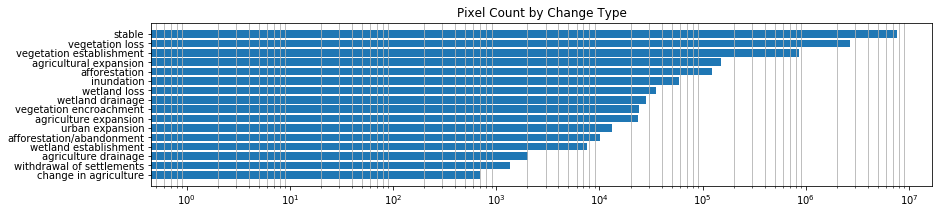

In [11]:
piedata = np.array(changes.stats[['Description','Count']]).T
plt.figure(figsize=(14,3))
plt.grid(True, which='minor', axis='x')
plt.barh(piedata[0], piedata[1], log=True)
plt.gca().invert_yaxis()
plt.title('Pixel Count by Change Type')
plt.show()

In [12]:
# TODO: Change matrix w/ counts (or pcts)

#### Save to disk

In [13]:
lccs_change.write_diff(changes, outputfile, debug=False)

In [19]:
# # Check the output file
# %%bash -s "$outputfile"
# ls -lh $1
# gdalinfo $1 

-rw-r--r-- 1 jovyan users 62M Feb 19 03:17 Townsville-diff.tif
Driver: GTiff/GeoTIFF
Files: Townsville-diff.tif
Size is 4000, 4000
Coordinate System is:
PROJCS["GDA94 / Australian Albers",
    GEOGCS["GDA94",
        DATUM["Geocentric_Datum_of_Australia_1994",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6283"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4283"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",-18],
    PARAMETER["standard_parallel_2",-36],
    PARAMETER["latitude_of_center",0],
    PARAMETER["longitude_of_center",132],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NOR

In [69]:
da.counts.keys() if 'counts' in da.attrs else np.unique(da.values)

dict_keys([111111, 111112, 111123, 111124, 111215, 111216, 111227, 111228, 112111, 112112, 112123, 112124, 112215, 112216, 112227, 112228, 123111, 123112, 123123, 123124, 123215, 123216, 123227, 123228, 124111, 124112, 124123, 124124, 124215, 124216, 124227, 124228, 215111, 215112, 215123, 215124, 215215, 215216, 215227, 215228, 216111, 216112, 216123, 216124, 216215, 216216, 216227, 216228, 227111, 227112, 227123, 227124, 227215, 227216, 227227, 228111, 228112, 228123, 228124, 228215, 228216, 228228])

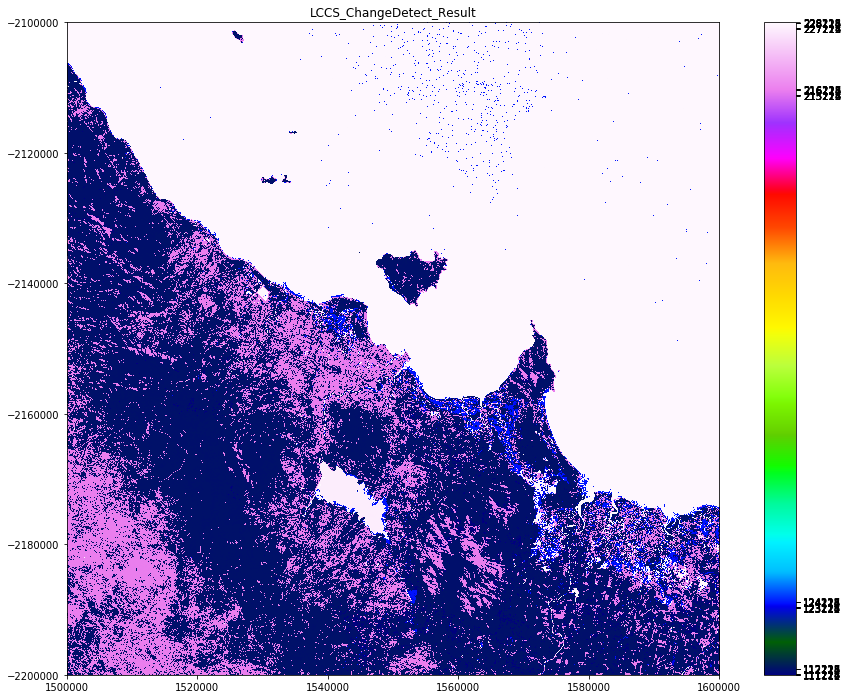

In [17]:
import matplotlib.cm as cm
da = changes
nodata=da.nodata

# Get all the values that were actually used so that labels aren't so crowded
unique_vals = list(da.counts.keys()) if 'counts' in da.attrs else np.unique(da.values)
if (nodata in unique_vals): unique_vals.remove(nodata)
vmin = np.min(unique_vals)
vmax = np.max(unique_vals)

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(12)
#cmap = cm.get_cmap('gist_ncar',len(unique_vals)) # Get discrete color map

cmap = cm.get_cmap('gist_ncar',vmax-vmin+1) # Get discrete color map
cax = ax.imshow(
    da.where(da!=da.nodata).values, 
    cmap=cmap, 
    interpolation='nearest',
    extent=[
        da.coords[da.dims[1]].values[0],
        da.coords[da.dims[1]].values[-1],
        da.coords[da.dims[0]].values[-1],
        da.coords[da.dims[0]].values[0]
    ],
    aspect='equal',
)
ax.set_title(da.name)

cbar_ticks = unique_vals
cbar_labels = [(LCCS_Transitions[v] if v in LCCS_Transitions else '') for v in unique_vals]

# nudge cbar to put ticks in middle of color bands
vmin = np.min(np.array(cbar_ticks))
vmax = np.max(np.array(cbar_ticks))
cax.set_clim(vmin-0.5,vmax+0.5)

cbar = fig.colorbar(cax, ticks=cbar_ticks, orientation='vertical')
#cbar.ax.set_yticklabels(cbar_labels)


In [8]:
#cmap = mplt.colors.ListedColormap(['red', '#000000','#444444', '#666666', '#ffffff', 'blue', 'orange'])
l = "#787878 #96d564 #7af4d8 #75f4d0 #f5c7fd #faec87 #00b3de #0078c8 #d4f52c \
#505050 #40e487 #f5c8f7 #f5d183 #60dffb #9bfbc5 #647864 #96FA64 #646464 #A7E6BE \
#FAC3F0 #FAEEBE #149EF4 #0FA0FA #ebf91f #1ac832 #7dedc6 #5a5a5a #e9b1e6 #feda48 \
#0abeee #0a9bee #cdf711 #86dad5 #d2faa4 #b4fac8 #4b4b4b #fae696 #c0effa #5087ff \
#f4fa13 #55e250 #03fcf8 #53fae1 #fa93f0 #6e6e6e #27c8f7 #2774f7 #f5f83e #85d964 \
#dbf652 #2ef7c8 #8c8c8c #f5b8c5 #3c3c3c #0c41f0 #dffa72 #64d26f #8ef8fb #64fbd8 \
#ccaccc #b6ae83 #fae696 #282828"
cmap = mplt.colors.ListedColormap(l.split(' '))

#112123 I don't have a colour map for this change NTV - CAV

boundaries = [int(x) for x in "111111 111112 111123 111124 111215 111216 111227 111228 \
112111 112112 112124 112215 112216 112227 112228 \
123111 123112 123123 123124 123215 123216 123227 123228 \
124111 124112 124123 124124 124215 124216 124227 124228 \
215111 215112 215123 215124 215215 215216 215227 215228 \
216111 216112 216123 216124 216215 216216 216227 216228 \
227111 227112 227123 227124 227215 227216 227227 227228 \
228111 228112 228123 228124 228215 228216 228227 228228".split(' ')]

In [62]:
cmap.N, len(boundaries)

(63, 63)

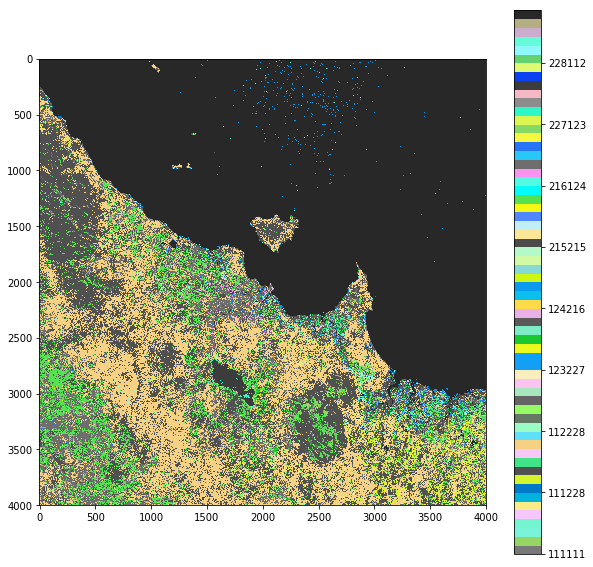

In [70]:
#boundaries = [111228, 112228, 123228, 124228, 215228, 216228, 227228]
norm = mplt.colors.BoundaryNorm(boundaries, cmap.N, clip=True)
plt.figure(figsize=(10, 10))
plt.pcolormesh(changes, cmap=cmap, norm=norm)

plt.colorbar()
plt.imshow(changes)